# Neural Network for Handwritten Digit Classification on MNIST Dataset using TensorFlow (TF) 

## Sajib (Ryhan) Suny
### N01654285


In [6]:
# imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Using simple Neural Network

In [8]:
# Loading the MNIST dataset
mnist_data = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [9]:
# Exploring the dataset
print("Training data shape:", train_images.shape)  
print("Test data shape:", test_images.shape)      

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


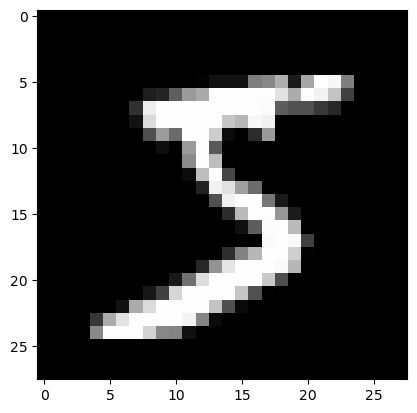

Label for the image: 5


In [10]:
# Displaying sample image
plt.imshow(train_images[0], cmap='gray')
plt.show()
print("Label for the image:", train_labels[0])

In [11]:
# Normalizing the image data to 0, 1
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

### Here I'm manually flattening the data

In [13]:
# Flattening the image data for the neural network
train_images_flattened = train_images_normalized.reshape(len(train_images), 28*28)
test_images_flattened = test_images_normalized.reshape(len(test_images), 28*28)

### So the model is simple with no flatten layer 

In [15]:
# Building a simple neural network model without hidden layers with 10 output 
simple_nn_model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [16]:
# Compile model
simple_nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
simple_nn_model.fit(train_images_flattened, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 821us/step - loss: 0.4658 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 1s 768us/step - loss: 0.3034 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 751us/step - loss: 0.2832 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 1s 737us/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 1s 734us/step - loss: 0.2664 - accuracy: 0.9260


### Evaluate the simple model

In [17]:
# Evaluate model
loss, accuracy = simple_nn_model.evaluate(test_images_flattened, test_labels)
print("Test accuracy:", accuracy)

313/313 [==============================] - 0s 703us/step - loss: 0.2704 - accuracy: 0.9253
Test accuracy: 0.9253000020980835


### Prediction:

In [20]:
# Predict labels
predicted_labels = simple_nn_model.predict(test_images_flattened)
predicted_labels = [np.argmax(label) for label in predicted_labels]

313/313 [==============================] - 0s 634us/step


## Accuracy of this SIMPLE NN model with NO HL = 0.92530

### Showing Confusion Matrix  of the SIMPLE NN

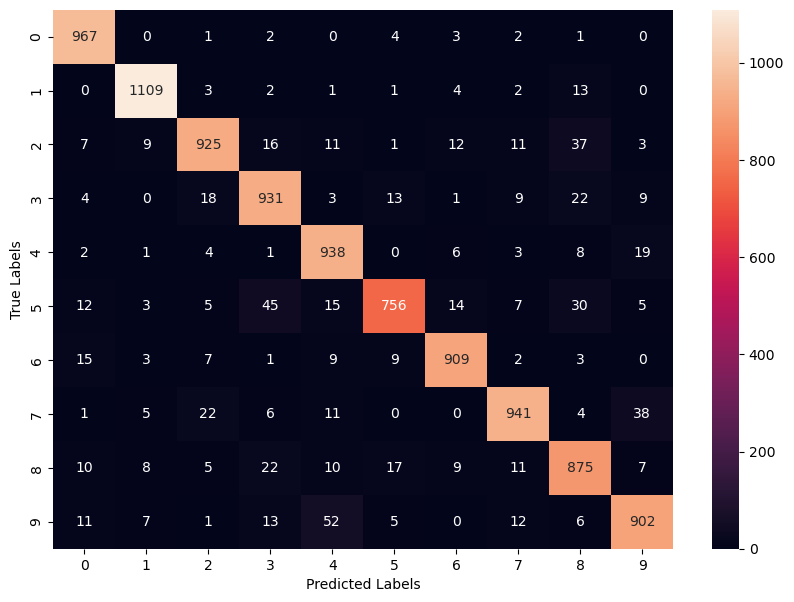

In [22]:
import seaborn as sn

# Visualize confusion matrix
conf_matrix = tf.math.confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sn.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 2. Using more complex NN with a hidden layer

#### # The first layer is a dense layer with 100 neurons, using ReLU activation, suitable for the input shape of 784 (flattened image size)

#### # The output layer is a dense layer with 10 neurons (one for each class), using sigmoid activation

In [24]:
model_with_hidden_layer = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [25]:
# Compile model
model_with_hidden_layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model_with_hidden_layer.fit(train_images_flattened, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2720 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1242 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 2s 987us/step - loss: 0.0858 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0648 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 2s 970us/step - loss: 0.0520 - accuracy: 0.9839


### Evaluate the enhanced model with one hidden layer

In [26]:
# Evaluate enhanced model
loss, accuracy = model_with_hidden_layer.evaluate(test_images_flattened, test_labels)
print("Test accuracy with hidden layer:", accuracy)

# Predict labels with enhanced model
predicted_labels_hidden_layer = model_with_hidden_layer.predict(test_images_flattened)
predicted_labels_hidden_layer = [np.argmax(label) for label in predicted_labels_hidden_layer]


313/313 [==============================] - 0s 793us/step - loss: 0.0784 - accuracy: 0.9764
Test accuracy with hidden layer: 0.9764000177383423
313/313 [==============================] - 0s 702us/step


## Accuracy of this NN model with one HL = 0.9764

## Improved from the simple NN model which was 0.92530

### Showing Confusion Matrix of this model

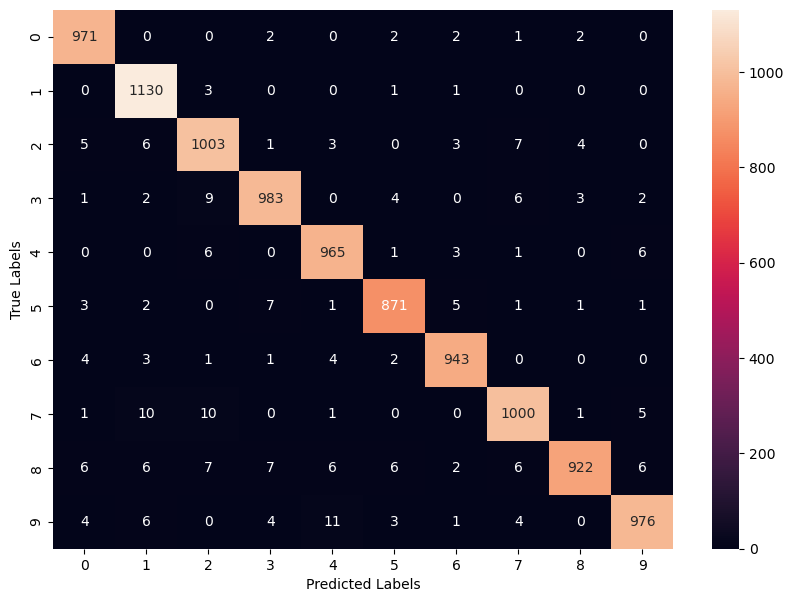

In [28]:
# Visualize confusion matrix
conf_matrix_hidden_layer = tf.math.confusion_matrix(test_labels, predicted_labels_hidden_layer)
plt.figure(figsize=(10, 7))
sn.heatmap(conf_matrix_hidden_layer, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 3. Using more COMPLEX Convolutional Neural Network (CNN)

In [29]:
# Reshaping the data to include the channel dimension
train_images_reshaped = train_images_normalized.reshape((-1, 28, 28, 1))
test_images_reshaped = test_images_normalized.reshape((-1, 28, 28, 1))

In [30]:
# Define a more complex CNN model
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [31]:
# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(train_images_reshaped, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2481 - accuracy: 0.9230 - val_loss: 0.0593 - val_accuracy: 0.9823
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0882 - accuracy: 0.9731 - val_loss: 0.0433 - val_accuracy: 0.9874
Epoch 3/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0682 - accuracy: 0.9791 - val_loss: 0.0426 - val_accuracy: 0.9879
Epoch 4/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0576 - accuracy: 0.9823 - val_loss: 0.0361 - val_accuracy: 0.9898
Epoch 5/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0363 - val_accuracy: 0.9902


### Evaluate the CNN model and predict

In [34]:
# Evaluate the CNN model
loss, accuracy = cnn_model.evaluate(test_images_reshaped, test_labels)
print("Test accuracy:", accuracy)

# Predict labels with the CNN model
predicted_labels_cnn = cnn_model.predict(test_images_reshaped)
predicted_labels_cnn = [np.argmax(label) for label in predicted_labels_cnn]


313/313 [==============================] - 1s 3ms/step - loss: 0.0296 - accuracy: 0.9891
Test accuracy: 0.9890999794006348
313/313 [==============================] - 1s 3ms/step


## ## Accuracy of this CNN model = 0.9891

### Better than the previous model which got 0.9764

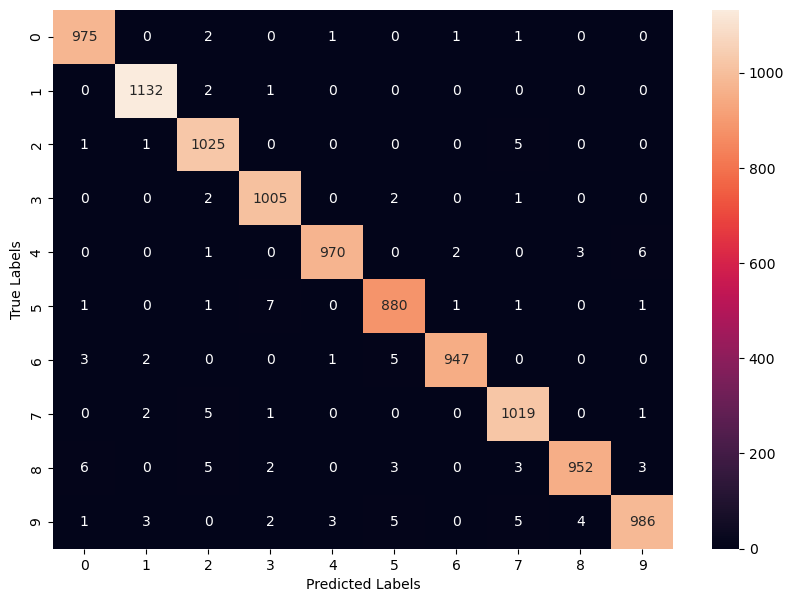

In [35]:
# Visualize confusion matrix for the CNN model
conf_matrix_cnn = tf.math.confusion_matrix(test_labels, predicted_labels_cnn)
plt.figure(figsize=(10, 7))
sn.heatmap(conf_matrix_cnn, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 4. Attemting to improve using enhanced CNN, More Convolutional Layers and DATA AUGMENTATION

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen

### Enhanced CNN

In [42]:
# Enhanced CNN Model
cnn_model_enhanced = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [54]:
# Compile the enhanced CNN model
cnn_model_enhanced.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the enhanced CNN model with data augmentation
history = cnn_model_enhanced.fit(datagen.flow(train_images_reshaped, train_labels, batch_size=64),
                       epochs=15, 
                       validation_data=(test_images_reshaped, test_labels))


Epoch 1/15
938/938 [==============================] - 44s 45ms/step - loss: 0.0465 - accuracy: 0.9862 - val_loss: 0.0134 - val_accuracy: 0.9951
Epoch 2/15
938/938 [==============================] - 42s 45ms/step - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0157 - val_accuracy: 0.9947
Epoch 3/15
938/938 [==============================] - 42s 45ms/step - loss: 0.0430 - accuracy: 0.9873 - val_loss: 0.0173 - val_accuracy: 0.9945
Epoch 4/15
938/938 [==============================] - 41s 44ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0146 - val_accuracy: 0.9952
Epoch 5/15
938/938 [==============================] - 41s 44ms/step - loss: 0.0436 - accuracy: 0.9872 - val_loss: 0.0156 - val_accuracy: 0.9950
Epoch 6/15
938/938 [==============================] - 40s 43ms/step - loss: 0.0400 - accuracy: 0.9878 - val_loss: 0.0180 - val_accuracy: 0.9946
Epoch 7/15
938/938 [==============================] - 41s 43ms/step - loss: 0.0369 - accuracy: 0.9886 - val_loss: 0.0144 - val_accuracy:

### Evaluate the enhanced CNN 

In [56]:
loss, accuracy = cnn_model_enhanced.evaluate(test_images_reshaped, test_labels)
print("Enhanced test accuracy:", accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.0143 - accuracy: 0.9952
Enhanced test accuracy: 0.995199978351593


## Accuracy of this ENHANCED CNN mode = 0.9952 
### Better than the previous CNN model which got 0.9891 


### Predict

In [57]:
# Predict labels with the enhanced CNN model
predicted_labels_cnn_enhanced = cnn_model_enhanced.predict(test_images_reshaped)
predicted_labels_cnn_enhanced = [np.argmax(label) for label in predicted_labels_cnn_enhanced]

313/313 [==============================] - 2s 6ms/step


### Generating Confusion Matrix and visualizing:

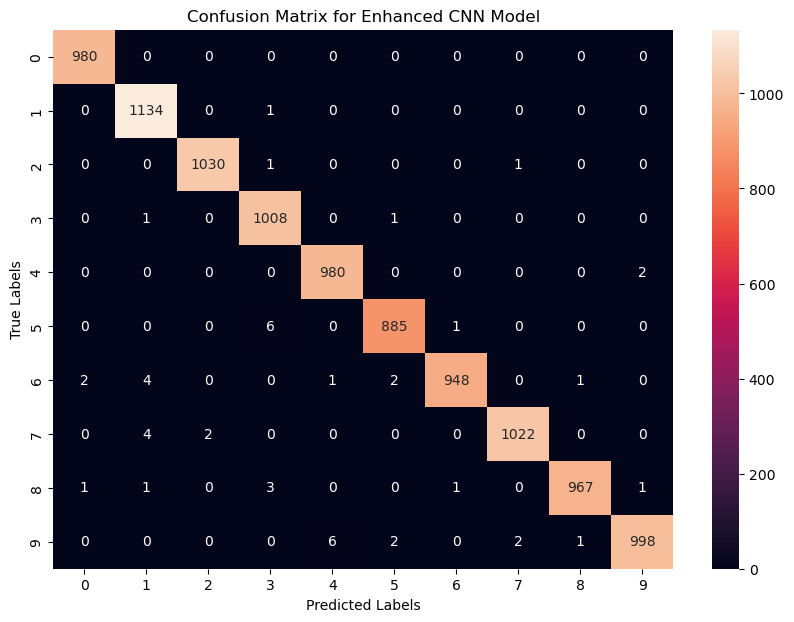

In [58]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix_cnn_enhanced = confusion_matrix(test_labels, predicted_labels_cnn_enhanced)

# # Visualize the confusion matrix
# plt.figure(figsize=(10, 7))
# sn.heatmap(conf_matrix_cnn_enhanced, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix for Enhanced CNN Model')
# plt.show()

plt.figure(figsize=(10, 7))
sn.heatmap(conf_matrix_cnn_enhanced, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Enhanced CNN Model')

plt.show()

### # Plotting the training and validation loss to visualize the model's performance over epochs

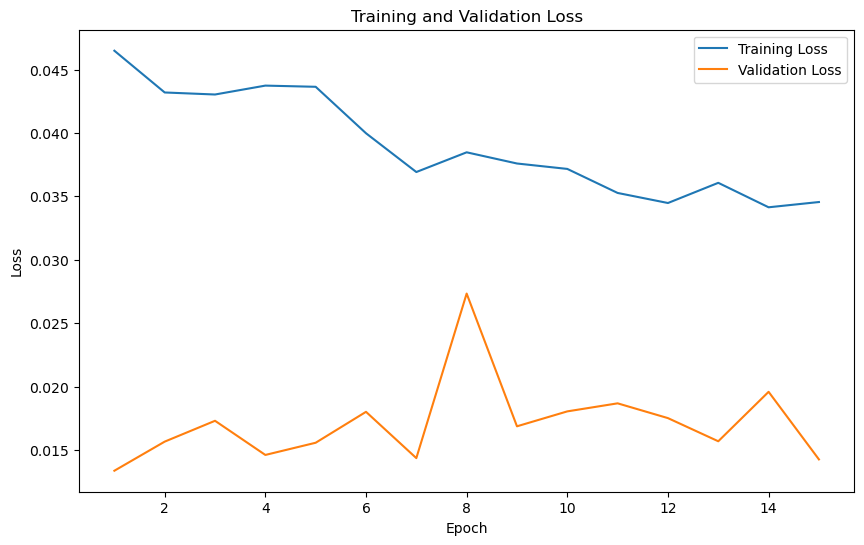

In [60]:
# Extract training and validation loss from the history
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), training_loss, label='Training Loss')
plt.plot(range(1, 16), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()